In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

IM_X = 640
IM_Y = 320

🌫🛸


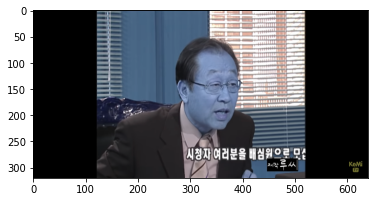

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/test3.PNG'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (IM_X, IM_Y))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

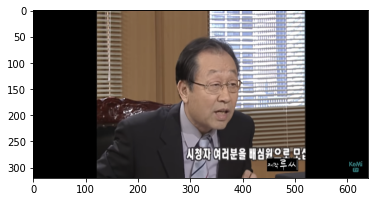

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


In [6]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


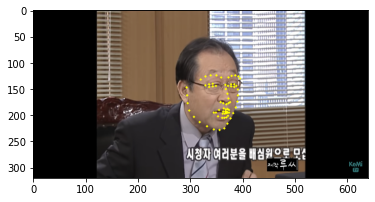

In [8]:


for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
#img_show 기본 배경
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:

#포문으로 딱히 돌릴 필요는없다. 30번점의 는 0 y 는 1 전체사각형의 넓이 dlib_rect.width()

x=0
y=0
w=0
h=0

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(373, 168)
(x,y) : (373,103)
(w,h) : (130,130)


In [10]:
#이미지 불러와서 노란박스 크기로 사이즈 매치함
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [11]:
#스티커의 중앙점을 맞춤. 왼쪽위라서. 중점에서 위로 1 왼쪽으로 0.5감.
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (308,-27)


In [12]:
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(103, 130, 3)
(x,y) : (308,0)


In [13]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

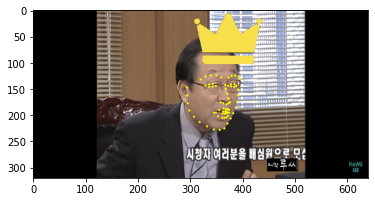

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

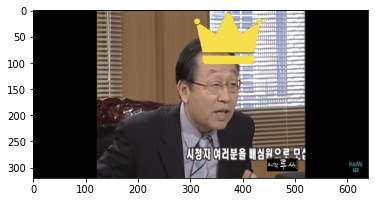

In [15]:
#여기서 원본 이미지를 건드림. 새로운 백버퍼를 만드는게 맞음

img_king = img_bgr.copy()
#img_king = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

sticker_area = img_king[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_king[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
#BGR이미지를 변환해서 출력됨.
plt.imshow(cv2.cvtColor(img_king, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
#포문으로 딱히 돌릴 필요는없다. 30번점의 는 0 y 는 1 전체사각형의 넓이 dlib_rect.width()
#이미지의 중심점. x y 를 구함.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = landmark[30][0] - landmark[2][0]
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(373, 168)
(x,y) : (373,103)
(w,h) : (78,130)


In [17]:
#수염 이미지를 불러옴.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/24674.png'
#img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)
img_sticker = cv2.resize(img_sticker, (w,h))



print (img_sticker.shape)

(130, 78, 3)


In [18]:
refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (334,103)


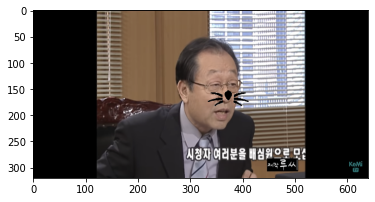

In [19]:
img_meow = img_bgr.copy()


sticker_area = img_meow[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_meow[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
#255 흰색 참이면이면 스티커영역이고 아니면  아니면 배경이미지다. 검은색부분만 출력됨.

plt.imshow(cv2.cvtColor(img_meow, cv2.COLOR_BGR2RGB))
plt.show()

0.955336489125606
373 103


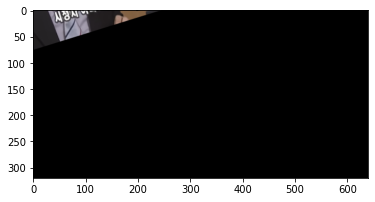

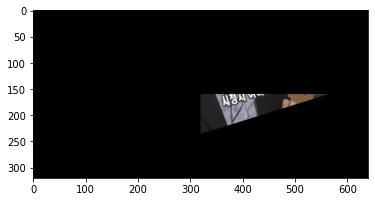

In [20]:
img_rot = img_bgr.copy()

rad = 0.3



print(np.cos(rad))
print(x, y)
aff = np.array([[np.cos(rad), np.sin(rad), -IM_X/2],
                [-np.sin(rad), np.cos(rad), -IM_Y/2]], dtype=np.float32)

dst = cv2.warpAffine(img_rot, aff, (0, 0))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


rad = 0.0
aff = np.array([[np.cos(rad), np.sin(rad),IM_X/2],
                [-np.sin(rad), np.cos(rad),IM_Y/2]], dtype=np.float32)

dst = cv2.warpAffine(dst, aff, (0, 0))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


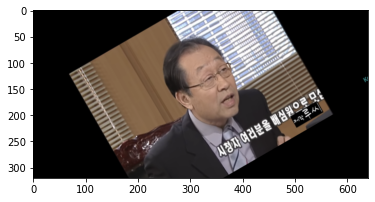

In [21]:
img_rot = img_bgr.copy()



rot_mat = cv2.getRotationMatrix2D( (IM_X/2, IM_Y/2), 30,1.0)




dst = cv2.warpAffine(img_rot, rot_mat, (IM_X,IM_Y))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()



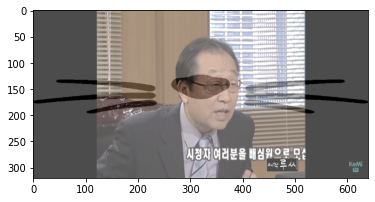

In [22]:
img_alpha = img_bgr.copy()


img_sticker = cv2.imread(sticker_path)
img_max_sticker = cv2.resize(img_sticker, (IM_X, IM_Y))
dst = cv2.addWeighted(img_alpha, 0.7, img_max_sticker, 0.3, 0)


plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

3.100798970721928
130 78
mask


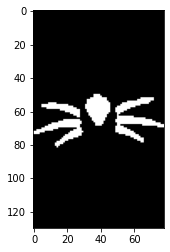

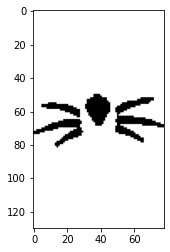

src1_bg


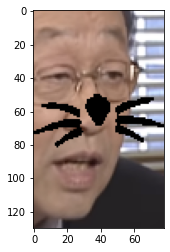

src2_fg


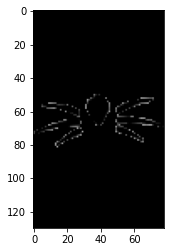

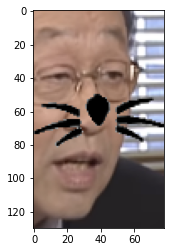

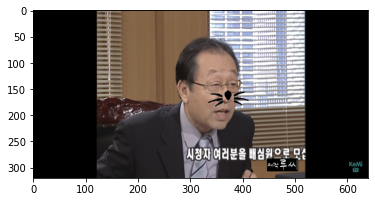

In [23]:
src1 = img_bgr.copy()


#img_sticker = cv2.imread(sticker_path)

img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR)
img_sticker = cv2.resize(img_sticker, (w,h))




#회전시 외부가 검은색이기때문에 흰배경 검은수염에선  검은 배경으로 반대로 바꿔야함.
img_sticker = cv2.bitwise_not(img_sticker)

rows, cols, channels = img_sticker.shape #로고파일 픽셀값 저장


#회전함수 준비후 회전.

#회전각 구하기.
dgree = 0
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    vec_x = landmark[16][0] - landmark[0][0]
    vec_y = landmark[16][1] - landmark[0][1]
    axis_x = 1
    axis_y = 0
    cosdgree = (vec_x *axis_x + vec_y *axis_y)/ ((vec_x**2 +vec_y**2) ** 0.5)
    dgree = np.arccos(-cosdgree)
    print(dgree)
    
rot_mat = cv2.getRotationMatrix2D( (cols/2, rows/2), dgree,1)
src2 = cv2.warpAffine(img_sticker, rot_mat, (cols,rows))

#소스를 원래기준으로 흰배경 검은수염으로 바꿈.
src2 = cv2.bitwise_not(src2)
roi = src1[refined_y:rows+refined_y,refined_x:cols+refined_x] #로고파일 필셀값을 관심영역(ROI)으로 저장함.

print( rows, cols )


print("mask")
gray = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY) #로고파일의 색상을 그레이로 변경
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY) #배경은 흰색으로, 그림을 검정색으로 변경
mask_inv = cv2.bitwise_not(mask)

plt.imshow(cv2.cvtColor(mask_inv, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

print("src1_bg")
src1_bg = cv2.bitwise_and(roi,roi,mask=mask) #배경에서만 연산 = src1 배경 복사
plt.imshow(cv2.cvtColor(src1_bg, cv2.COLOR_BGR2RGB))
plt.show()


print("src2_fg")
src2_fg = cv2.bitwise_and(src2,src2, mask = mask_inv) #로고에서만 연산
plt.imshow(cv2.cvtColor(src2_fg, cv2.COLOR_BGR2RGB))
plt.show()
 
dst = cv2.bitwise_or(src1_bg, src2_fg) #src1_bg와 src2_fg를 합성
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


#refined_y 이미지의 y시작점 refined_x x시작점. x위치부터 이미지의 가로길이 만큼 이동됨.
src1[refined_y:rows+refined_y,refined_x:cols+refined_x] = dst



plt.imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))
plt.show()